In [1]:
# Importaciones necesarias

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carga de los datos

df = pd.read_csv('Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv', low_memory=False)
df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


In [3]:
# Cambiar nombre de las columnas (eliminar espacio en blanco)

df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'ARMAS MEDIOS',
       'FECHA HECHO', 'GENERO', 'GRUPO ETARIO', 'CANTIDAD'],
      dtype='object')

In [4]:
df.rename(columns={'CODIGO DANE' :'CODIGO_DANE',
                   'ARMAS MEDIOS':'ARMAS_MEDIO',
                   'FECHA HECHO' :'FECHA',
                   'GRUPO ETARIO':'GRUPO_ETARIO'}, inplace=True);

print(df.columns)
df.head()

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO_DANE', 'ARMAS_MEDIO', 'FECHA',
       'GENERO', 'GRUPO_ETARIO', 'CANTIDAD'],
      dtype='object')


,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS_MEDIO,FECHA,GENERO,GRUPO_ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476970 entries, 0 to 476969
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476970 non-null  object
 1   MUNICIPIO     476970 non-null  object
 2   CODIGO_DANE   476970 non-null  object
 3   ARMAS_MEDIO   476968 non-null  object
 4   FECHA         476970 non-null  object
 5   GENERO        476967 non-null  object
 6   GRUPO_ETARIO  475355 non-null  object
 7   CANTIDAD      476970 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 29.1+ MB


In [6]:
# Consultar valores nulos
df.isnull().sum()

DEPARTAMENTO       0
MUNICIPIO          0
CODIGO_DANE        0
ARMAS_MEDIO        2
FECHA              0
GENERO             3
GRUPO_ETARIO    1615
CANTIDAD           0
dtype: int64

ADULTOS: 420237
ADOLESCENTES: 28396
MENORES: 26448
NO REPORTA: 274


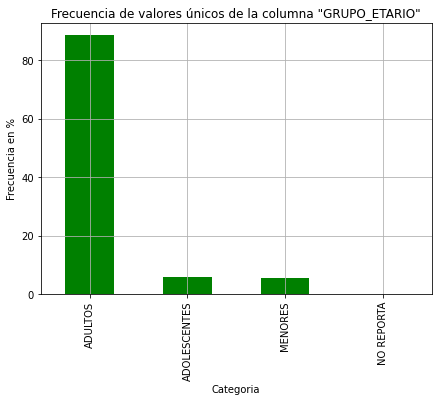

In [7]:
# Reemplazar valores faltantes por la moda de cada columna.
# El grupo etario es el parámetro crítico a este respecto

valores_unicos_GEtario = df['GRUPO_ETARIO'].value_counts()

for index in valores_unicos_GEtario.index:
    print(f'{index}: {valores_unicos_GEtario[index]}') 

plt.figure(figsize=(7, 5))
(100*valores_unicos_GEtario/valores_unicos_GEtario.sum()).plot(kind='bar', color='green')
plt.title('Frecuencia de valores únicos de la columna "GRUPO_ETARIO"')
plt.xlabel('Categoria')
plt.ylabel('Frecuencia en %')
plt.grid()
plt.show();

In [8]:
# Dado que la la categoría "ADULTOS" representa casi el 90% de los valores en "GRUPO_ETARIO", resulta apropiado
# reemplazar los valores faltantes por la moda

for columna in df.columns:
    df[columna].fillna(df[columna].mode()[0], inplace = True)

# En la columna "GRUPO_ETARIO" también reemplazaré los valores "NO REPORTA" por la media
moda_grupoEtario = df['GRUPO_ETARIO'].mode()[0]
df.loc[df['GRUPO_ETARIO'] == 'NO REPORTA', 'GRUPO_ETARIO'] = moda_grupoEtario

df.isnull().sum()

DEPARTAMENTO    0
MUNICIPIO       0
CODIGO_DANE     0
ARMAS_MEDIO     0
FECHA           0
GENERO          0
GRUPO_ETARIO    0
CANTIDAD        0
dtype: int64

ADULTOS: 422126
ADOLESCENTES: 28396
MENORES: 26448


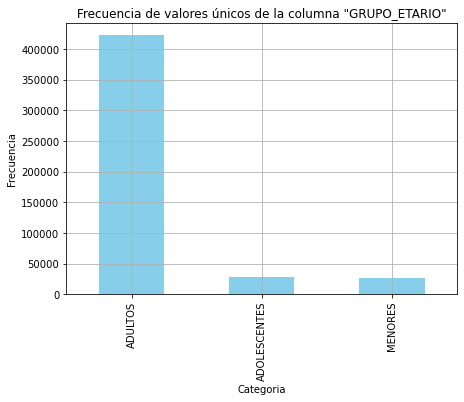

In [9]:
valores_unicos_GEtario = df['GRUPO_ETARIO'].value_counts()

for index in valores_unicos_GEtario.index:
    print(f'{index}: {valores_unicos_GEtario[index]}')

plt.figure(figsize=(7, 5))
df['GRUPO_ETARIO'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de valores únicos de la columna "GRUPO_ETARIO"')
plt.xlabel('Categoria')
plt.ylabel('Frecuencia')
plt.grid()
plt.show();

In [10]:
# Exploración
df[['DEPARTAMENTO','MUNICIPIO','CODIGO_DANE','ARMAS_MEDIO','FECHA','GENERO','GRUPO_ETARIO']].describe()

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS_MEDIO,FECHA,GENERO,GRUPO_ETARIO
count,476970,476970,476970,476970,476970,476970,476970
unique,33,1022,1102,11,4176,4,3
top,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,1/01/2020,FEMENINO,ADULTOS
freq,88100,53792,53792,244947,860,366910,422126


In [11]:
# Explorar 'GENERO'

100*df['GENERO'].value_counts()/df['GENERO'].value_counts().sum() # Géneros por porcentaje

FEMENINO      76.925173
MASCULINO     23.011720
NO REPORTA     0.061639
-              0.001468
Name: GENERO, dtype: float64

In [12]:
# Dada la baja proporción que representa "NO REPORTA" y "-", reemplazaré estos datos con la moda de la columna
moda_genero = df['GENERO'].mode()[0]
df.loc[df['GENERO'] == 'NO REPORTA', 'GENERO'] = moda_genero
df.loc[df['GENERO'] == '-', 'GENERO'] = moda_genero
print(df['GENERO'].value_counts())
100*df['GENERO'].value_counts()/df['GENERO'].value_counts().sum() # Géneros por porcentaje

FEMENINO     367211
MASCULINO    109759
Name: GENERO, dtype: int64


FEMENINO     76.98828
MASCULINO    23.01172
Name: GENERO, dtype: float64

In [13]:
# Explorar las columnas restantes

for columna in df.columns:
    print(df[columna].value_counts(), '\n')

CUNDINAMARCA          88100
ANTIOQUIA             57288
VALLE                 44909
SANTANDER             38493
BOYACÁ                26920
ATLÁNTICO             17516
TOLIMA                17007
HUILA                 16547
META                  16223
BOLÍVAR               15954
NORTE DE SANTANDER    14919
RISARALDA             14381
NARIÑO                14373
CAUCA                 13947
CÓRDOBA               10800
SUCRE                  9745
MAGDALENA              9691
CALDAS                 8742
CESAR                  7109
CASANARE               6418
CAQUETÁ                4857
QUINDÍO                4800
GUAJIRA                4434
ARAUCA                 3852
PUTUMAYO               3104
CHOCÓ                  2071
AMAZONAS               1408
SAN ANDRÉS             1155
GUAVIARE                886
GUAINÍA                 518
VICHADA                 424
VAUPÉS                  373
NO REPORTA                6
Name: DEPARTAMENTO, dtype: int64 

BOGOTÁ D.C. (CT)         53792
MEDELLÍN (

In [14]:
# Reemplazar los "NO REPORTA" y "-" por la moda en las columnas restantes

for columna in df.columns:
    moda = df[columna].mode()[0]
    df.loc[df[columna] == 'NO REPORTA', columna] = moda
    df.loc[df[columna] == '-', columna] = moda
    print(df[columna].value_counts(), '\n')

CUNDINAMARCA          88106
ANTIOQUIA             57288
VALLE                 44909
SANTANDER             38493
BOYACÁ                26920
ATLÁNTICO             17516
TOLIMA                17007
HUILA                 16547
META                  16223
BOLÍVAR               15954
NORTE DE SANTANDER    14919
RISARALDA             14381
NARIÑO                14373
CAUCA                 13947
CÓRDOBA               10800
SUCRE                  9745
MAGDALENA              9691
CALDAS                 8742
CESAR                  7109
CASANARE               6418
CAQUETÁ                4857
QUINDÍO                4800
GUAJIRA                4434
ARAUCA                 3852
PUTUMAYO               3104
CHOCÓ                  2071
AMAZONAS               1408
SAN ANDRÉS             1155
GUAVIARE                886
GUAINÍA                 518
VICHADA                 424
VAUPÉS                  373
Name: DEPARTAMENTO, dtype: int64 

BOGOTÁ D.C. (CT)         53800
MEDELLÍN (CT)            22032
CALI (C

El porcentaje de casos donde se reportan 10 afectados es 0.122%



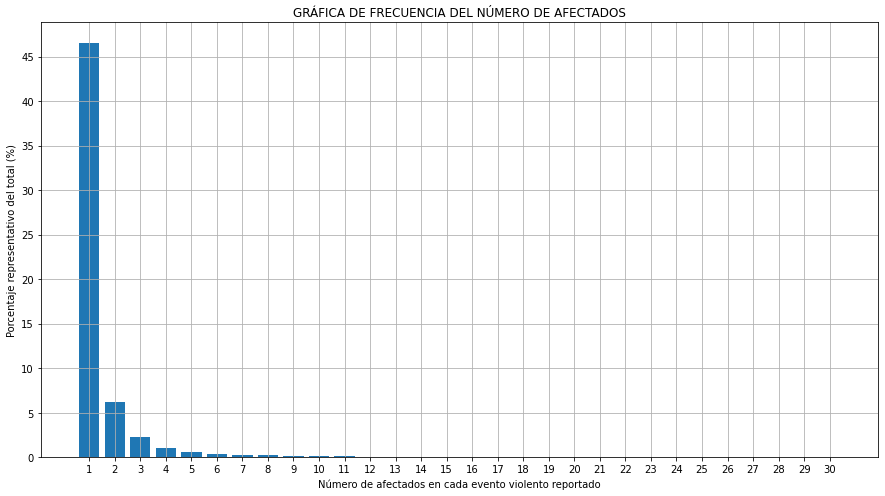

In [15]:
# Eliminación de Outliers: no tiene sentido que un caso de violencia doméstica involucre a más de 10 personas.
# Exploremos la columna 'CANTIDAD' para obtener una mejor visión de posibles errores

total_casos = df['CANTIDAD'].sum()
distribucion_cantidad = []
limite = 30
for cantidad in range(1, limite+1):
    cntd = 100*df[df['CANTIDAD'] == cantidad]['CANTIDAD'].count()/total_casos
    distribucion_cantidad.append(cntd)

print(f'El porcentaje de casos donde se reportan 10 afectados es {round(distribucion_cantidad[9], 3)}%\n')

# Zona de gráficos
plt.figure(figsize=(15, 8))
plt.xlabel('Número de afectados en cada evento violento reportado')
plt.xticks(range(1, limite+1))
plt.ylabel('Porcentaje representativo del total (%)')
plt.yticks(range(0, int(max(distribucion_cantidad)), 5))
plt.title('GRÁFICA DE FRECUENCIA DEL NÚMERO DE AFECTADOS')
plt.grid()
plt.bar(range(1, len(distribucion_cantidad)+1), distribucion_cantidad);
#plt.bar(range(len(distribucion_cantidad)), distribucion_cantidad);

Se puede decir, pues, que los eventos de violencia doméstica en los cuales resultan más de 10 involucrados pueden ser considerados como Outliers (quizas debido a errores de digitación). Dado que tales casos representan solo una fracción del total, no hay problema en suprimirlos del dataframe y no considerarlos en análisis posteriores.

In [16]:
# Eliminación de Outliers

df = df.query('CANTIDAD <= 10').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470529 entries, 0 to 470528
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  470529 non-null  object
 1   MUNICIPIO     470529 non-null  object
 2   CODIGO_DANE   470529 non-null  object
 3   ARMAS_MEDIO   470529 non-null  object
 4   FECHA         470529 non-null  object
 5   GENERO        470529 non-null  object
 6   GRUPO_ETARIO  470529 non-null  object
 7   CANTIDAD      470529 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 28.7+ MB


In [17]:
# Cambiar el formato de las fechas

#import pandas as pd

# Función para convertir fechas
def convertir_fecha(fecha):
    try:
        # Intentar convertir directamente usando el formato específico
        return pd.to_datetime(fecha, format='%d/%m/%Y')
    except ValueError:
        try:
            # Si falla, asumir que es un número de fecha serial de Excel y convertirlo
            return pd.to_datetime('1899-12-30') + pd.to_timedelta(int(fecha), unit='D')
        except ValueError:
            # Manejo de otros posibles errores o datos corruptos
            return pd.NaT

'''# Crear un DataFrame de ejemplo con fechas en diferentes formatos
df = pd.DataFrame({
    'FECHA': ['01/12/2020', '15/01/2021', '23/03/2021', '44335']
})'''

# Aplicar la función de conversión a la columna 'FECHA'
df['FECHA'] = df['FECHA'].apply(convertir_fecha)

#print(df)
print(df.dtypes)


DEPARTAMENTO            object
MUNICIPIO               object
CODIGO_DANE             object
ARMAS_MEDIO             object
FECHA           datetime64[ns]
GENERO                  object
GRUPO_ETARIO            object
CANTIDAD                 int64
dtype: object


In [18]:
df['FECHA'].value_counts()

2020-01-01    860
2020-03-01    662
2020-03-08    637
2020-02-02    590
2020-02-16    589
             ... 
2010-12-23     17
2011-12-31     16
2013-12-28     14
2010-12-03     14
2010-12-30     13
Name: FECHA, Length: 4169, dtype: int64

In [19]:
df.tail(10)

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS_MEDIO,FECHA,GENERO,GRUPO_ETARIO,CANTIDAD
470519,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-03-27,FEMENINO,ADULTOS,1
470520,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-04-15,FEMENINO,ADULTOS,1
470521,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-05-19,FEMENINO,ADULTOS,3
470522,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,2021-05-19,MASCULINO,ADULTOS,1
470523,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,2021-01-03,FEMENINO,ADULTOS,1
470524,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,2021-02-23,FEMENINO,MENORES,1
470525,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,2021-03-07,FEMENINO,ADULTOS,1
470526,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,2021-04-14,FEMENINO,ADULTOS,1
470527,CUNDINAMARCA,TAUSA,25793000,CONTUNDENTES,2021-04-08,FEMENINO,ADULTOS,1
470528,CUNDINAMARCA,ZIPAQUIRÁ,25899000,CONTUNDENTES,2021-02-18,FEMENINO,ADULTOS,1


In [20]:
# Guardar dataframe ya limpio en formato csv y en una base de datos
'''
AQUÍ
IRÁ
EL
CÓDIGO

'''

'\nAQUÍ\nIRÁ\nEL\nCÓDIGO\n\n'

# Ya está listo el DataFrame. Ahora hay que iniciar el análisis

## Exploración de los datos

### Distribución temporal de los datos

In [21]:
# Exploraré el total de casos (y su tipología) a través de los años

print(f'El PRIMER registro se llevó a cabo en la siguiente fecha: {df.FECHA.min()}')
print(f'El ÚLTIMO registro se llevó a cabo en la siguiente fecha: {df.FECHA.max()}')

El PRIMER registro se llevó a cabo en la siguiente fecha: 2010-01-01 00:00:00
El ÚLTIMO registro se llevó a cabo en la siguiente fecha: 2021-05-31 00:00:00


In [22]:
total_por_agno = df['FECHA'].dt.year.value_counts().sort_index()

In [23]:
print(total_por_agno)

2010     15150
2011     17012
2012     20439
2013     21870
2014     29735
2015     44570
2016     49098
2017     49753
2018     46989
2019     51649
2020    102286
2021     21978
Name: FECHA, dtype: int64


In [24]:
total_por_agno.sum()

470529

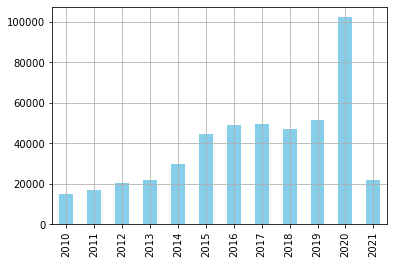

In [25]:
total_por_agno.plot(kind='bar', color='skyblue')
plt.grid()

Dado que en el último año de registro (2021) no se tienen datos de todos los meses (sólo hasta el mes 05), NO puede decirse que hubo una reducción en los casos para el año 2021. Con el fin de tener más claridad a este respecto, analizaremos el total de casos para cada año, pero sólo hasta el mes 05

In [26]:
df_hasta_05 = df[df['FECHA'].dt.month <= 5]
total_agno_hasta_05 = df_hasta_05['FECHA'].dt.year.value_counts().sort_index()
print(total_agno_hasta_05)

2010     7029
2011     7509
2012     9081
2013    10360
2014    14682
2015    18139
2016    21667
2017    21401
2018    21374
2019    19040
2020    48213
2021    21978
Name: FECHA, dtype: int64


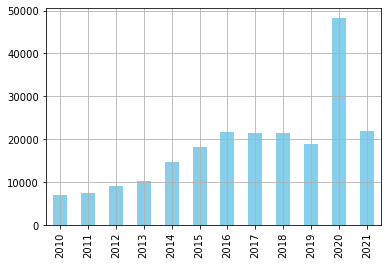

In [27]:
total_agno_hasta_05.plot(kind='bar', color='skyblue')
plt.grid();

CONCLUSIÓN: Efectivamente es de esperarse una reducción de los casos de violencia doméstica para el año 2021 respecto al 2020. El año 2020 es un año atípico en relación al resto de años. Es de esperarse que el año 2021 se comporte como un año típico (según los datos analizados hasta el mes 05).

¿Cuál es la razón del dramático aumento en los casos de violencia doméstica en el año 2020? Dicho año 2020 se inició la cuarentena por COVID-19 en Colombia. El confinamiento puede ser un factor que explique el aumento en los casos de violencia.

A continuación se estudiará la distribución mensual de los datos, para tener un panorama completo de la distribución temporal de los registros.

In [28]:
# DataFrame dividido por año
dfs_por_año = [df[df['FECHA'].dt.year == i] for i in range(df.FECHA.min().year, df.FECHA.max().year)]

In [29]:
# Casos por mes para cada año (de 2010 a 2020)
casos_mes_todosAgnos = [tabla['FECHA'].dt.month.value_counts().sort_index() for tabla in dfs_por_año]

# Casos por mes para cada año (de 2010 a 2020) NORMALIZADO
casos_mes_todosAgnosNORM = [serie.divide(serie.max()) for serie in casos_mes_todosAgnos]

In [30]:
casos_mes_todosAgnosNORM[-1]

1     0.955792
2     1.000000
3     0.748587
4     0.598414
5     0.764785
6     0.607526
7     0.651396
8     0.656036
9     0.735173
10    0.732304
11    0.691302
12    0.488231
Name: FECHA, dtype: float64

In [31]:
casos_mes_todosAgnos[-1]

1     11329
2     11853
3      8873
4      7093
5      9065
6      7201
7      7721
8      7776
9      8714
10     8680
11     8194
12     5787
Name: FECHA, dtype: int64

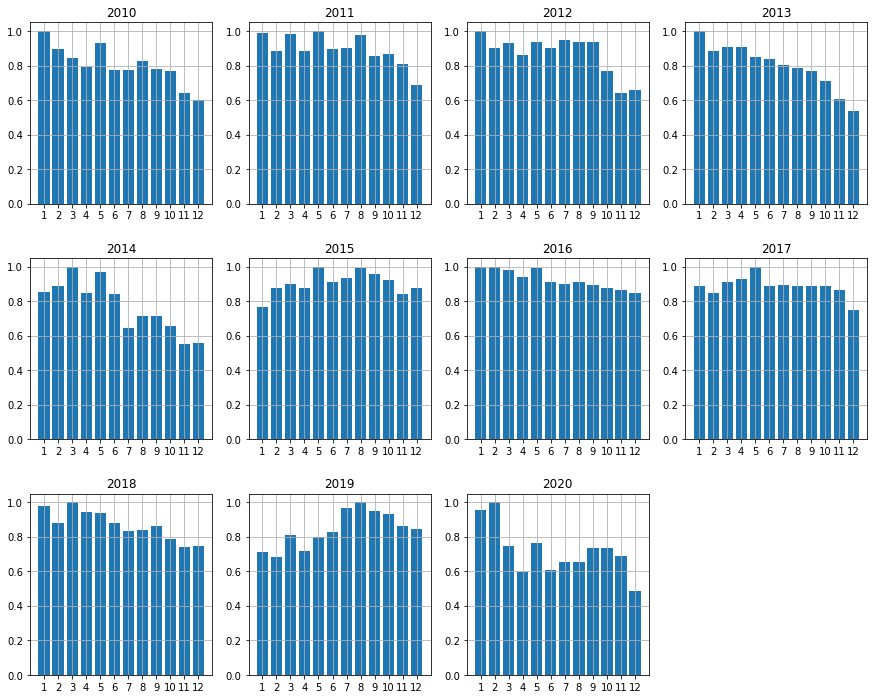

In [32]:
import numpy as np
X = np.linspace(0, 10, 50)
plt.figure(figsize=(15, 12))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

for idx, serie in enumerate(casos_mes_todosAgnosNORM):
    plt.subplot(3, 4, idx+1)
    plt.bar(serie.index, serie.values)
    plt.title(str(2010+idx))
    plt.xticks(range(1, 13))
    plt.grid()

In [98]:
# ¿Cuál es el día más violento de cada año?

for idx, tabla in enumerate(dfs_por_año):    
    conteo = tabla['FECHA'].value_counts()
    print(str(2010 + idx), f': {conteo.idxmax()}')

2010 : 2010-01-01 00:00:00
2011 : 2011-01-01 00:00:00
2012 : 2012-01-01 00:00:00
2013 : 2013-01-01 00:00:00
2014 : 2014-01-01 00:00:00
2015 : 2015-05-10 00:00:00
2016 : 2016-01-01 00:00:00
2017 : 2017-01-01 00:00:00
2018 : 2018-01-01 00:00:00
2019 : 2019-01-01 00:00:00
2020 : 2020-01-01 00:00:00


Claramente, el primero de enero es el día con mayor número de reportes de violencia doméstica. Esto es debido quizas a las fiestas de fin de año, las cuales van acompañadas de alto consumo de alcohol. La única desviación a este patrón ocurre el año 2015, donde la fecha de mayor reportes de violencia doméstica es el 10 de mayo, el cual fue el día de las madres, la cual es otra fecha que tradicionalmente tiene altas tazas de violencia general.

### Distribución espacial

In [99]:
import folium

In [117]:
latitud = 4.5709
longitud = -74.2973

# Crear el mapa centrado en Colombia
mapa = folium.Map(location=[latitud, longitud], zoom_start=5.4)

#mapa = folium.Map()
mapa